**Gradient Boosting Classifier**

Gradient Boosting is an ensemble method that builds a strong predictive model by combining the predictions of several weaker models, specially decision trees.

Gradient Boosting is to iteratively train new models that focus on the “residuals” or errors of the previous models.

*   It starts with an initial, simple model.
*   In each subsequent step, a new weak learner (a decision tree) is trained to predict the residuals (the difference between the actual target and the current model”s prediction).
*   The predictions of this new tree are then added to the ensemble, gradually improving the overall model”s accuracy.
*   This process continues for a specified number of iterations, or until performance improvement stagnates.





**Scikit-learn”s GradientBoostingClassifier**

Scikit-learn, provides a robust implementation of Gradient Boosting through its GradientBoostingClassifier. This class allows you to easily apply this powerful algorithm to your classification problems.

Key Parameters for GradientBoostingClassifier in sklearn



*   n_estimators: This is the number of boosting stages, essentially the number of weak learners (trees) to build. More estimators generally mean a more complex model, but also a higher risk of overfitting.
*   learning_rate: this parameter controls the contribution of each tree to the overall prediction. A smaller learning rate requires more estimators but can lead to more robust models.


*   max_depth: The maximum depth of the individual regression estimators (decision trees). Deeper trees can model more complex relationships but are more prone to overfitting
*   subsample: The fraction of samples to be used for fitting the individual base learners. Setting this to less than 1.0 introduces Stochastic Gradient Boosting, which can reduce variance and improve generalization.


*   loss: The loss function to be optimized. For classification, common choices include “deviance” (for logistic regression) and “exponential” (for AdaBoost-like behavior). “deviance” is the default and generally recommended for classification.








**Fitting a GradientBoostingClassifier**

Here I've used a sklearn's breast cancer dataset

In [ ]:
#import required modules and dataset from sklearn

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load the dataset

data = load_breast_cancer()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# view first few rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Spilt the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (455, 30)
Testing data shape: (114, 30)


In [ ]:

# Single Decision Tree

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

print("\n=== Decision Tree Performance ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_tree))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_tree))


=== Decision Tree Performance ===
Train Accuracy: 0.9758241758241758
Test Accuracy : 0.9385964912280702


In [ ]:

# Gradient Boosting Classifier

# Initialize the Gradient Boosting Classifier
gbClassifier = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Train the Gradient Boosting Classifier
gbClassifier.fit(X_train, y_train)

y_train_pred_gb = gbClassifier.predict(X_train)
y_test_pred_gb = gbClassifier.predict(X_test)

# Calculate the accuracy
print("\n=== Gradient Boosting Performance ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_gb))


=== Gradient Boosting Performance ===
Train Accuracy: 1.0
Test Accuracy : 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



 While the standalone Decision Tree achieved strong performance, Gradient Boosting delivered even higher accuracy and more balanced precision/recall metrics by sequentially correcting the errors of previous weak learners. Its ability to reduce bias and improve generalization resulted in a higher test accuracy (≈95.6%) compared to the Decision Tree (≈93.9%).


**Hyperparameter Tuning for Optimal Performance**

Using GridSearchCV

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV

gb = GradientBoostingClassifier(random_state=42)

grid = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9780219780219781


In [ ]:
# Get the best estimator

best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on the test set with the best model

y_pred_best = best_model.predict(X_test)

print("\n=== Final Gradient Boosting Performance ===")
print("Train Accuracy:", best_model.score(X_train, y_train))
print("Test Accuracy :", accuracy_score(y_test, y_pred_best))

print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


=== Final Gradient Boosting Performance ===
Train Accuracy: 1.0
Test Accuracy : 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



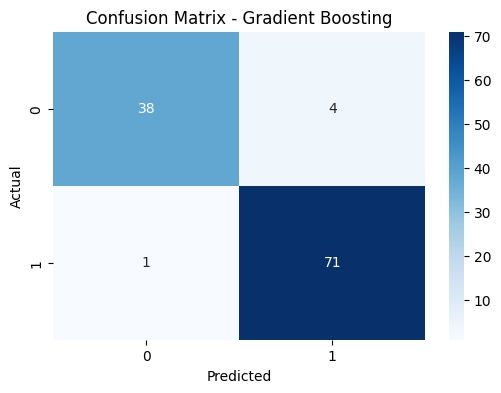

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

After applying hyperparameter tuning, the model achieved a cross-validation accuracy of 0.978, with final test accuracy remaining stable at 0.956, indicating excellent generalization. The classification report shows high precision, recall, and F1-score for both classes, and the confusion matrix confirms that misclassifications were minimal (only 5 total errors).

True Negatives (TN = 38)
The model correctly identified 38 benign cases.

False Positives (FP = 4)
Four benign cases were incorrectly classified as malignant.

False Negatives (FN = 1)
one malignant case was incorrectly predicted as benign.

True Positives (TP = 71)
The model correctly predicted 71 malignant cases.

Overall, the results highlight how Gradient Boosting can outperform a simple decision tree by building an ensemble that learns iteratively from mistakes, leading to more robust and reliable predictions in medical classification tasks.

Github Repository

https://github.com/KokilaSivakumar06/Machine-Learning-Assignment---Individual